# Decision Tress

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

## Training and Visualizing

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [7]:
iris = load_iris()
X = iris.data[:,2:] # Petal Length and Width
y =iris.target

In [18]:
tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [19]:
from graphviz import Source
from sklearn.tree import export_graphviz

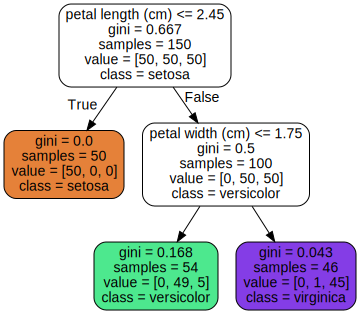

In [20]:
export_graphviz(tree_clf,
                out_file="./data/iris_tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

Source.from_file("./data/iris_tree.dot")

In [21]:
from matplotlib.colors import ListedColormap

In [22]:
def make_mesh(lims,h=100):
    x = np.linspace(lims[0],lims[1],h)
    y = np.linspace(lims[2],lims[3],h)
    xx,yy = np.meshgrid(x,y)
    return xx,yy

In [35]:
def plot_decision_boundary(clf,
                           X,
                           y,
                           lims,
                           ax,
                           legend=False,
                           contour=False,
                           plot_training=True):
                           
    x1, x2 = make_mesh(lims, 100)
    X_new = np.c_[x1.flatten(), x2.flatten()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_map = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    ax.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_map)
    if contour:
        custom_map2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
    if plot_training:
        for ind, (label,style) in enumerate(zip(labels,styles)):
            ax.plot(X[:,0][y == ind],X[:,1][y == ind],style,label=label)
    if iris:
        ax.set(xlabel="Petal Length",ylabel="Petal Width")
    else:
        ax.set(xlabel=r"$x_1$",ylabel=r"$x_2$")
    if legend:
        ax.legen(loc="lower right")

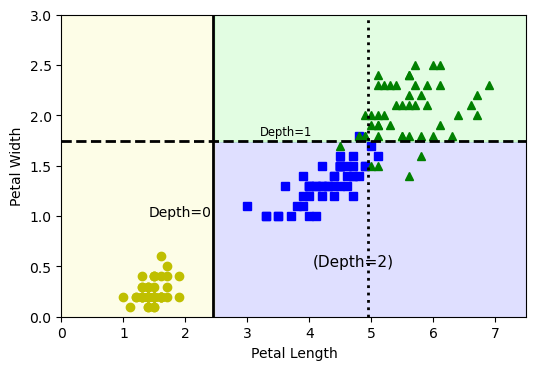

In [36]:
# Set Parameters:
lims = [0, 7.5, 0, 3]

labels = ["Iris setosa", "Iris versicolor", "Iris virginica"]
styles = ["yo", "bs", "g^"]

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

plot_decision_boundary(tree_clf, X, y, lims, ax=ax)
splits = [2.45, 1.75, 4.95, 4.85]

ax.axvline(splits[0],lims[2],lims[3],c='k',ls="-",lw=2)
ax.axhline(splits[1],lims[0],lims[1],c='k',ls="--",lw=2)
ax.axvline(splits[2],lims[2],lims[1],c='k',ls=":",lw=2)
ax.axvline(splits[3],lims[1],lims[3],c='k',ls=":",lw=2)
ax.text(1.4,1,"Depth=0",fontsize='medium')
ax.text(3.2,1.8,"Depth=1",fontsize='small')
ax.text(4.05,0.5,"(Depth=2)",fontsize=11)

plt.show()